In [1]:
import zipfile
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error


Matplotlib is building the font cache; this may take a moment.


In [2]:

with zipfile.ZipFile("archive.zip", "r") as zip_ref:
    zip_ref.extractall("data")

print("ZIP file extracted successfully!")



ZIP file extracted successfully!


In [9]:

df = pd.read_csv("sample_submission.csv")

# Show first 5 rows
df.head()


,id,MedHouseVal
0,37137,2.079751
1,37138,2.079751
2,37139,2.079751
3,37140,2.079751
4,37141,2.079751


In [10]:
print("Dataset shape:", df.shape)


print("Columns:", df.columns)

df.info()

Dataset shape: (24759, 2)
Columns: Index(['id', 'MedHouseVal'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24759 entries, 0 to 24758
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           24759 non-null  int64  
 1   MedHouseVal  24759 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 387.0 KB


In [11]:
df.describe()


,id,MedHouseVal
count,24759.000000,2.475900e+04
mean,49516.000000,2.079751e+00
std,7147.451994,1.105360e-12
min,37137.000000,2.079751e+00
25%,43326.500000,2.079751e+00
50%,49516.000000,2.079751e+00
75%,55705.500000,2.079751e+00
max,61895.000000,2.079751e+00


In [12]:
df.isnull().sum()


id             0
MedHouseVal    0
dtype: int64

In [13]:

X = df.drop("MedHouseVal", axis=1)
y = df["MedHouseVal"]

print("X shape:", X.shape)
print("y shape:", y.shape)


X shape: (24759, 1)
y shape: (24759,)


In [14]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Training data:", X_train.shape)
print("Testing data:", X_test.shape)


Training data: (19807, 1)
Testing data: (4952, 1)


In [15]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [16]:
linear_model = LinearRegression()
linear_model.fit(X_train_scaled, y_train)

print("Linear Regression model trained successfully!")


Linear Regression model trained successfully!


In [17]:
y_pred = linear_model.predict(X_test_scaled)

# Compare predictions
comparison = pd.DataFrame({
    "Actual Price": y_test.values[:5],
    "Predicted Price": y_pred[:5]
})

comparison


,Actual Price,Predicted Price
0,2.079751,2.079751
1,2.079751,2.079751
2,2.079751,2.079751
3,2.079751,2.079751
4,2.079751,2.079751


In [18]:
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("Linear Regression Performance")
print("MAE:", mae)
print("RMSE:", rmse)


Linear Regression Performance
MAE: 0.0
RMSE: 0.0


In [19]:
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train_scaled, y_train)

ridge_pred = ridge_model.predict(X_test_scaled)

ridge_rmse = np.sqrt(mean_squared_error(y_test, ridge_pred))
print("Ridge Regression RMSE:", ridge_rmse)


Ridge Regression RMSE: 0.0


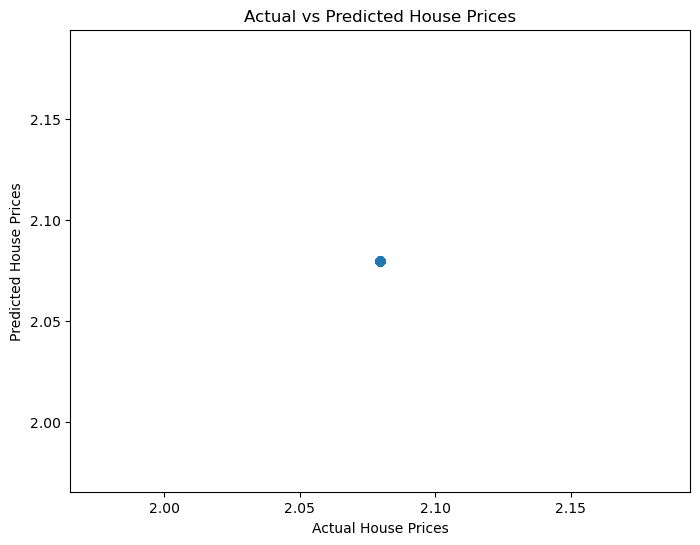

In [20]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual House Prices")
plt.ylabel("Predicted House Prices")
plt.title("Actual vs Predicted House Prices")
plt.show()
